In [2]:
import pandas as pd
import numpy as np
import os
import re
import haversine as hs
import spacy
import morfeusz2
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [3]:
path = f'data_processed/main.csv'
df = pd.read_csv(path)

In [4]:
df.head(5)

,added_dt,last_update,link,expired,expired_date,title,rent_price,area_room_num,floor,ogrzewanie,flat_condition,available_from,deposit,advertiser_type,additional_information,location,latitude,longitude,approximate_coordinates,year_of_construction,elevator,building_type,security,equipment,utilities,safeguards,adv_description,district
0,22.12.2024,22.12.2024,https://www.otodom.pl/pl/oferta/piekne-mieszka...,1,2025_01_04,Piękne mieszkanie na warszawskich Skoroszach,3 000 zł\n/miesiąc\n+ Czynsz 600 zł,45m²\nWynajmę również studentom\n2 pokoje,3/6,inne,do zamieszkania,NaN,3 000 zł,prywatny,balkon\ngaraż/miejsce parkingowe,"ul. Skoroszewska, Skorosze, Ursus, Warszawa, m...",52.189750,20.899275,False,2013.0,tak,apartamentowiec,teren zamknięty\nmonitoring / ochrona,zmywarka\nlodówka\nmeble\npiekarnik\nkuchenka\...,NaN,drzwi / okna antywłamaniowe\ndomofon / wideofon,Wynajmę mieszkanie 45 metrów na warszawskim Ur...,Ursus
1,15.12.2024,21.12.2024,https://www.otodom.pl/pl/oferta/zarezerwowane-...,1,2025_01_08,[ZAREZERWOWANE] przy Metrze Daszyńskiego,3 950 zł\n/miesiąc\n+ Czynsz 690 zł,42m²\n2 pokoje,2/8,miejskie,do zamieszkania,NaN,8 000 zł,prywatny,balkon\ngaraż/miejsce parkingowe,"ul. Karolkowa, Czyste, Wola, Warszawa, mazowie...",52.226621,20.978226,False,2020.0,tak,apartamentowiec,teren zamknięty\nmonitoring / ochrona,zmywarka\nlodówka\nmeble\npiekarnik\nkuchenka\...,internet,drzwi / okna antywłamaniowe\ndomofon / wideofon,English version below.\n\nMIESZKANIE\nNowoczes...,Wola
2,18.12.2024,18.12.2024,https://www.otodom.pl/pl/oferta/nowe-2-pokojow...,1,2025_01_02,Nowe 2-pokojowe wysoki standard| Saska Kępa|Garaż,4 700 zł\n/miesiąc\n+ Czynsz 750 zł,45m²\n2 pokoje\ntylko dla niepalących,2/4,miejskie,do zamieszkania,NaN,NaN,prywatny,balkon\ngaraż/miejsce parkingowe\ntylko dla ni...,"Osiedle Lizbońska, Saska Kępa, Praga-Południe,...",52.228044,21.063960,False,2024.0,tak,apartamentowiec,monitoring / ochrona,zmywarka\nlodówka\nmeble\npiekarnik\nkuchenka\...,NaN,domofon / wideofon,Do wynajęcia NOWE 2-pokojowe mieszkanie o powi...,Praga-Południe
3,14.12.2023,22.12.2024,https://www.otodom.pl/pl/oferta/3-pok-70m2-pow...,1,2025_01_09,"3 pok, 70m2, Powstańców Śl. Metro Bemowo, Garaż",4 200 zł\n/miesiąc\n+ Czynsz 911 zł,70m²\n3 pokoje\ntylko dla niepalących,3/7,miejskie,do zamieszkania,NaN,6 500 zł,prywatny,balkon\ntaras\ngaraż/miejsce parkingowe\npiwni...,"ul. Powstańców Śląskich 89c, Ewen Shiraz, Górc...",52.243598,20.910004,False,2008.0,tak,apartamentowiec,teren zamknięty\nmonitoring / ochrona,zmywarka\nlodówka\nmeble\npiekarnik\nkuchenka\...,NaN,domofon / wideofon,BEZPOŚREDNIO OD WŁAŚCICIELA - dostępne - Najem...,Bemowo
4,4.12.2024,22.12.2024,https://www.otodom.pl/pl/oferta/ostoja-wilanow...,0,NaN,"Ostoja Wilanów, 3 pokoje, 2 miejsca post. w ce...",7 300 zł\n/miesiąc\n+ Czynsz 1 040 zł,73m²\n3 pokoje,2/4,miejskie,do zamieszkania,NaN,10 000 zł,prywatny,balkon\ntaras\ngaraż/miejsce parkingowe,"ul. Prymasa Augusta Hlonda, Błonia Wilanowskie...",52.158041,21.066512,False,2016.0,tak,apartamentowiec,monitoring / ochrona,zmywarka\nlodówka\nmeble\npiekarnik\nkuchenka\...,NaN,drzwi / okna antywłamaniowe\ndomofon / wideofon,Komfortowy apartament wykończony w wysokim sta...,Wilanów


In [5]:
df.tail(1)

,added_dt,last_update,link,expired,expired_date,title,rent_price,area_room_num,floor,ogrzewanie,flat_condition,available_from,deposit,advertiser_type,additional_information,location,latitude,longitude,approximate_coordinates,year_of_construction,elevator,building_type,security,equipment,utilities,safeguards,adv_description,district
18285,2025_02_28,NaN,https://www.otodom.pl/pl/oferta/penthouse-mias...,0,NaN,penthouse | miasteczko wilanów | unikatowy taras,25 000 zł\n/miesiąc,210m²\n5 pokoi,4/4,miejskie,do zamieszkania,2025-03-03,50 000 zł,biuro nieruchomości,taras\nbalkon\ngaraż/miejsce parkingowe,"ul. Franciszka Klimczaka, Błonia Wilanowskie, ...",52.162742,21.07485,False,2008.0,tak,loft,NaN,klimatyzacja,NaN,NaN,NIERUCHOMOŚĆ:\n\n\n\nBudynek przy ul. Klimczak...,Wilanów


In [6]:
### To delete
path = f'data_processed/main.csv'
df = pd.read_csv(path)

### Only expired announcements

In [8]:
df = df[df.expired.eq(1)]

### Convert dates, calculate duration between announcement appearance and expiration

In [10]:
def convert_date(date_str):
    try:
        if '.' in date_str:  # Format 1: 'DD.MM.YYYY'
            return pd.to_datetime(date_str, format='%d.%m.%Y')
        elif '_' in date_str:  # Format 2: 'YYYY_MM_DD'
            return pd.to_datetime(date_str, format='%Y_%m_%d')
    except Exception:
        return None
    
df['added_dt'] = df['added_dt'].apply(convert_date)
df['expired_date'] = df['expired_date'].apply(convert_date)

df['days_difference'] = (df['expired_date'] - df['added_dt']).dt.days

In [12]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

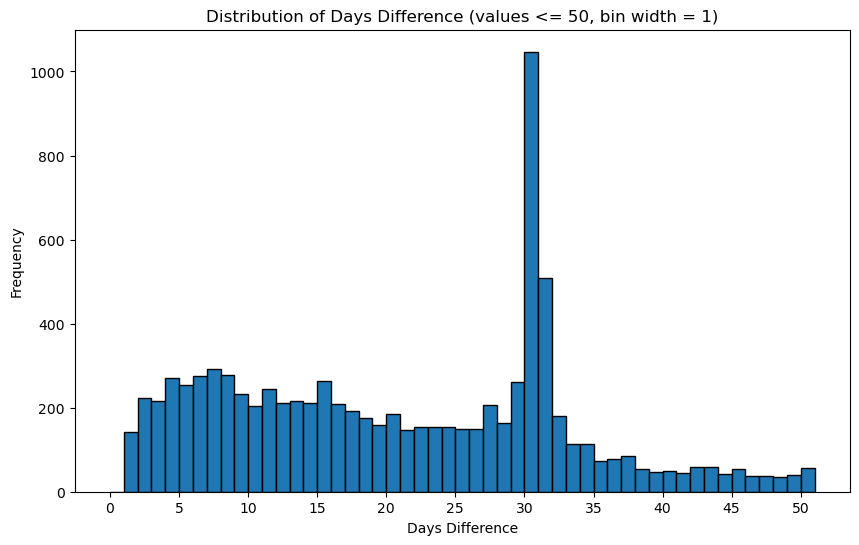

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

df_filtered = df[df['days_difference'] <= 50]

# Create bins from 0 to 50 with a bin width of 1
bins = range(0, 52, 1)  # 0-51 ensures bins for values 0 to 50

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_filtered['days_difference'], bins=bins, edgecolor='black')
plt.xlabel('Days Difference')
plt.ylabel('Frequency')
plt.title('Distribution of Days Difference (values <= 50, bin width = 1)')
plt.xticks(range(0, 51, 5))
plt.show()

In [ ]:
df = df[df.days_difference.le(21)].copy()

### Extract rental information, exclude prices not in PLN

In [22]:
def extract_rent_info(text):
    # Extract rent
    rent_match = re.search(r'(\d[\d\s]*)\s*([A-Za-zł]+)', text)
    rent = int(rent_match.group(1).replace(" ", "")) if rent_match else None
    rent_currency = rent_match.group(2) if rent_match else None

    # Extract additional fees
    fees_match = re.search(r'\+ Czynsz (\d[\d\s]*)\s*([A-Za-zł]+)', text)
    additional_fees = int(fees_match.group(1).replace(" ", "")) if fees_match else 0
    additional_fees_currency = fees_match.group(2) if fees_match else None

    # Extract payment frequency
    freq_match = re.search(r'/(\w+)', text)
    payment_frequency = freq_match.group(1) if freq_match else None

    return pd.Series([rent, rent_currency, additional_fees, additional_fees_currency, payment_frequency])

df[['rent', 'rent_currency', 'additional_fees', 'additional_fees_currency', 'payment_frequency']] = df['rent_price'].apply(extract_rent_info)

In [24]:
df = df[df.rent_currency.eq('zł')&\
        (df.additional_fees_currency.eq('zł')|df.additional_fees_currency.isna())].copy()

### Area, room_number, students_allowed, non_smoker_only

In [28]:
def extract_area(text):
    match = re.search(r'(\d+(?:\.\d+)?)m²', text)
    return float(match.group(1)) if match else None

def extract_rooms(text):
    match = re.search(r'(\d+)\s*pok', text)
    return int(match.group(1)) if match else None

df['area'] = df['area_room_num'].apply(extract_area)
df['room_number'] = df['area_room_num'].apply(extract_rooms)
df['students_allowed'] = df['area_room_num'].str.contains('Wynajmę również studentom').astype(int)
df['non_smoker_only'] = df['area_room_num'].str.contains('tylko dla niepalących').astype(int)

### Floor, building_height

In [33]:
def parse_floor_values(row: str) -> tuple:
    """
    Parses a string containing floor information to extract the specific floor and the total number of floors in the building.

    Parameters:
    - row (str): The string from which to parse floor information. Can be NaN, a single number, a range in 'X/Y' format, 
                 or special formats like 'parter' or '>X'.

    Returns:
    - tuple: A tuple containing two elements:
        1. floor (int or None): The specific floor number, or None if not determinable.
        2. building_height (int or None): The total number of floors in the building, or None if not applicable.
    """
    
    if pd.isna(row):
        return None, None
    if '/' in row:
        parts = row.split('/')
        floor_part = parts[0].strip()
        if floor_part.isdigit():
            floor = int(floor_part)
        elif floor_part == 'parter':
            floor = 1
        elif floor_part.startswith('>'):
            floor = int(floor_part[1:].strip())
        else:
            floor = None

        height_part = parts[1].strip()
        if height_part.isdigit():
            building_height = int(height_part)
        else:
            building_height = None
    else:
        floor = int(row) if row.isdigit() else None
        building_height = None
    
    return floor, building_height

df[['floor', 'building_height']] = df['floor'].apply(lambda x: pd.Series(parse_floor_values(x)))

### for_renovation/flat_condition

In [36]:
df['for_renovation'] = df['flat_condition'].apply(
    lambda x: 0 if pd.isna(x) or x == 'do zamieszkania' else 1)

### heating

In [39]:
df.rename(columns={'ogrzewanie': 'heating'}, inplace=True)

df['heating'] = df['heating'].replace({
    'elektryczne': 'electric',
    'gazowe': 'gas',
    'inne': 'other',
    'kotłownia': 'boiler room',
    'miejskie': 'district'
})

### advertiser_type

In [42]:
df['advertiser_type'] = df['advertiser_type'].replace({
    'prywatny': 'owner',
    'biuro nieruchomości': 'agency',
    'deweloper': 'developer'
})

### balcony / terrace / garden / parking_space / separate_kitchen / utility_room / basement

In [45]:
df['balcony'] = df['additional_information'].apply(lambda x: 1 if type(x)==str and 'balkon' in x else 0)
df['terrace'] = df['additional_information'].apply(lambda x: 1 if type(x)==str and 'taras' in x else 0)
df['garden'] = df['additional_information'].apply(lambda x: 1 if type(x)==str and 'ogródek' in x else 0)
df['parking_space'] = df['additional_information'].apply(lambda x: 1 if type(x)==str and 'garaż/miejsce parkingowe' in x else 0)
df['separate_kitchen'] = df['additional_information'].apply(lambda x: 1 if type(x)==str and 'oddzielna kuchnia' in x else 0)
df['utility_room'] = df['additional_information'].apply(lambda x: 1 if type(x)==str and 'pom. użytkowe' in x else 0)
df['basement'] = df['additional_information'].apply(lambda x: 1 if type(x)==str and 'piwnica' in x else 0)

### elevator

In [48]:
df['elevator'] = df['elevator'].apply(lambda x: x == 'tak').astype(int)

### building_type

In [51]:
df['building_type'] = df['building_type'].replace({
    'apartamentowiec': 'apartment',
    'kamienica': 'tenement',
    'blok': 'block_of_flats'
})
df.loc[~df['building_type'].fillna('').isin(['apartment', 'tenement', 'block_of_flats']), 'building_type'] = 'other'

### seciurity / safeguards

In [54]:
df['gated_community'] = df['security'].apply(lambda x: 1 if type(x)==str and 'teren zamknięty' in x else 0)
df['security_monitoring'] = df['security'].apply(lambda x: 1 if type(x)==str and 'onitoring / ochrona' in x else 0)
df['safeguards'] = df['safeguards'].apply(
    lambda x:1 if type(x)==str and\
    ('system alarmowy' in x or 'antywłamaniowe' in x) else 0)

### building_age

In [57]:
df.loc[(df['year_of_construction'] < 1600) | (df['year_of_construction'] > 2025), 'year_of_construction'] = np.nan
df['building_age'] = 2025 - df['year_of_construction']

### internet / cable_tv

In [67]:
df['cable_tv'] = df['utilities'].apply(lambda x: 1 if type(x)==str and 'telewizja kablowa' in x else 0)
df['internet'] = df['utilities'].apply(lambda x: 1 if type(x)==str and 'internet' in x else 0)

In [ ]:
internet

In [ ]:
df.equipment.unique()

### dishwasher / air_conditioning

In [79]:
def initialize_nlp() -> None:
    """
    Initializes a global NLP model using the spaCy library with the Polish small model.
    This allows the `nlp` model to be used elsewhere in the code after initialization.

    Returns:
    - None
    """
    global nlp
    nlp = spacy.load("pl_core_news_sm")

    return None

In [81]:
def initialize_morf() -> None:
    """
    Initializes a global morphological analyzer using the Morfeusz2 library.
    This prepares `morf` for use throughout the codebase for morphological analysis tasks.

    Returns:
    - None
    """
    global morf
    morf = morfeusz2.Morfeusz()

    return None

In [83]:
def contains_keywords_morf(description: str, keywords: list):
    """
    Determines whether a given text description contains any of a list of keywords based on morphological analysis.

    This function processes the input text using a natural language processing model to tokenize the text.
    For each token, it performs a morphological analysis to identify the base form of the word.
    The function then checks if this base form matches any of the keywords provided in the list.
    It returns True as soon as a keyword match is found and stops further analysis.

    Parameters:
    - description (str): The text description to analyze for the presence of keywords.
    - keywords (list): A list of keyword strings to search for in the text, based on their morphological base forms.

    Returns:
    - bool: True if at least one of the keywords is found in the text, False otherwise.

    Requires:
    - A loaded natural language processing model (nlp) to tokenize the text.
    - A morphological analysis tool morfeusz2 (morf) that provides the base form of each token.
    """

    try:
        doc = nlp(description.lower())
    except AttributeError:
        return False
    
    contains_keywords = False
    for token in doc:
        analysis = morf.analyse(token.text)
        try:
            contains_keywords = True if analysis[0][2][1] in keywords else contains_keywords
        except IndexError:
            continue

        if contains_keywords:
            break
            
    return contains_keywords

In [93]:
initialize_nlp()
initialize_morf()

In [95]:
df['dishwasher'] = df.apply(
    lambda row: (not pd.isna(row['equipment']) and 'zmywarka' in row['equipment']) or\
        contains_keywords_morf(row['adv_description'], ['zmywarka']),
    axis=1)

In [ ]:
df['air_conditioning'] = df.apply(
    lambda row: (not pd.isna(row['equipment']) and 'klimatyzacja' in row['equipment']) or\
        contains_keywords_morf(row['adv_description'], ['klimatyzacja', 'klimatyzator']),
    axis=1)